# Twitch-PT

In [1]:
import pandas as pd
import networkx as nx
from methods import find_groups
from ablation_metrics import compare_subgroups, evaluate_pattern_subgroups
import matplotlib.pyplot as plt
from torch_geometric.datasets import Twitch

In [2]:
dataset = Twitch(root='./data/Twitch', name='PT')

data = dataset[0]

Processing...
Done!


In [3]:
class CustomGraphDataset:
    def __init__(self, dataset):
        self.dataset = dataset

    def __getitem__(self, idx):
        graph_data = self.dataset[idx]
        
        graph_metrics = {
            'edge_index': graph_data.edge_index,
            'num_nodes': graph_data.num_nodes,
            'node_feat': graph_data.x
        }
        
        labels = graph_data.y
        return graph_metrics, labels

    def __len__(self):
        return len(self.dataset)

custom_dataset = CustomGraphDataset(dataset)
graph, label = custom_dataset[0]

In [4]:
edge_index = data.edge_index 
num_nodes = data.num_nodes 
G = nx.Graph()

G.add_nodes_from(range(num_nodes))

edges = list(zip(edge_index[0].tolist(), edge_index[1].tolist()))
G.add_edges_from(edges)

In [5]:
label

tensor([0, 0, 0,  ..., 1, 0, 1])

In [6]:
attributes = graph['node_feat']
lu = pd.DataFrame(attributes)
lu['target'] = label == 1
lu.head()

,0,1,2,3,4,5,6,7,8,9,...,119,120,121,122,123,124,125,126,127,target
0,-0.213545,5.203393,-0.160547,-0.217247,-0.212379,-0.203340,-0.538649,-0.411488,-0.150398,-0.165370,...,-0.239307,-0.214107,-0.355245,-0.149007,-0.213861,-0.375776,1.312829,-0.255846,-0.183876,False
1,-0.236669,-0.230716,-0.160547,-0.130489,-0.212379,-0.203848,-0.538649,-0.411488,-0.162248,-0.223381,...,4.099865,-0.214107,-0.355245,-0.175422,0.012436,-0.373406,1.484898,-0.255846,-0.183876,False
2,-0.188405,-0.230716,-0.151268,-0.184601,-0.211119,-0.009926,-0.538649,-0.411488,-0.162248,-0.223381,...,-0.202553,-0.214107,-0.355245,-0.115830,-0.149139,-0.375621,1.406220,-0.255846,-0.172436,False
3,-0.206178,-0.230716,-0.160547,-0.217247,-0.172571,-0.203848,-0.538649,-0.411488,-0.162248,-0.223381,...,-0.174710,-0.214107,-0.355245,-0.175370,-0.200265,2.671659,1.353870,-0.255846,-0.183876,False
4,-0.236669,-0.230716,-0.160547,-0.217247,-0.212379,-0.202109,-0.538649,-0.411488,-0.162248,-0.223381,...,-0.239307,-0.214107,-0.355245,-0.175422,-0.213861,-0.375776,1.338136,-0.252739,-0.183876,False


In [7]:
result_normal = find_groups(G, 20, lu, ablation_mode=False)
result_normal

100%|██████████| 1912/1912 [13:30<00:00,  2.36it/s]


,rho,sigma,q,ranks,reference,subgroup
node,,,,,,
490,10,3,0.328634,"[(490, False), (1404, False), (295, False), (1...","[490, 1404, 295, 1734, 608, 1366, 1614, 274, 1...","[490, 1404, 295]"
1459,15,5,0.269430,"[(1459, True), (1259, False), (455, False), (8...","[1459, 1259, 455, 866, 1311, 654, 1821, 1763, ...","[1459, 1259, 455, 866, 1311]"
609,8,3,0.255155,"[(609, False), (902, False), (1666, True), (15...","[609, 902, 1666, 1524, 598, 637, 1647, 1700]","[609, 902, 1666]"
1191,7,3,0.249392,"[(1191, False), (984, True), (1476, False), (1...","[1191, 984, 1476, 1068, 1733, 441, 1807]","[1191, 984, 1476]"
1550,11,5,0.220647,"[(1550, True), (1747, False), (391, True), (14...","[1550, 1747, 391, 1476, 467, 56, 654, 428, 168...","[1550, 1747, 391, 1476, 467]"
497,25,6,0.212289,"[(497, True), (1758, False), (1660, False), (1...","[497, 1758, 1660, 1259, 467, 1476, 501, 428, 9...","[497, 1758, 1660, 1259, 467, 1476]"
1532,38,5,0.210006,"[(1532, False), (1366, False), (679, False), (...","[1532, 1366, 679, 103, 1476, 6, 384, 1066, 111...","[1532, 1366, 679, 103, 1476]"
503,15,8,0.206917,"[(503, False), (1782, False), (423, True), (13...","[503, 1782, 423, 1397, 725, 677, 341, 417, 138...","[503, 1782, 423, 1397, 725, 677, 341, 417]"
1733,9,5,0.198762,"[(1733, True), (1131, True), (1477, False), (1...","[1733, 1131, 1477, 1758, 1383, 587, 507, 1807,...","[1733, 1131, 1477, 1758, 1383]"


In [8]:
result_normal.to_csv('subgroups_twitch.csv')

In [9]:
result_ablation = find_groups(G, 20, lu, ablation_mode=True)
result_ablation

100%|██████████| 1912/1912 [14:22<00:00,  2.22it/s]


,rho,sigma,q,ranks,reference,subgroup
node,,,,,,
188,1912,269,0.092034,"[(188, True), (1541, False), (1154, True), (60...","[188, 1541, 1154, 608, 1593, 1787, 1416, 135, ...","[188, 1541, 1154, 608, 1593, 1787, 1416, 135, ..."
1408,1912,107,0.084033,"[(1408, True), (1132, True), (911, False), (64...","[1408, 1132, 911, 649, 1608, 101, 190, 1736, 1...","[1408, 1132, 911, 649, 1608, 101, 190, 1736, 1..."
369,1912,240,0.079759,"[(369, True), (428, True), (654, True), (275, ...","[369, 428, 654, 275, 1593, 1476, 1821, 467, 11...","[369, 428, 654, 275, 1593, 1476, 1821, 467, 11..."
767,1912,77,0.079177,"[(767, False), (933, True), (560, True), (1767...","[767, 933, 560, 1767, 604, 1809, 992, 1361, 19...","[767, 933, 560, 1767, 604, 1809, 992, 1361, 19..."
868,1912,200,0.079009,"[(868, True), (1608, True), (102, False), (116...","[868, 1608, 102, 116, 751, 472, 300, 636, 176,...","[868, 1608, 102, 116, 751, 472, 300, 636, 176,..."
604,1912,91,0.078011,"[(604, True), (1308, True), (1205, True), (146...","[604, 1308, 1205, 1467, 654, 59, 1660, 1259, 1...","[604, 1308, 1205, 1467, 654, 59, 1660, 1259, 1..."
1673,1912,115,0.077292,"[(1673, True), (1787, False), (870, False), (4...","[1673, 1787, 870, 409, 1543, 141, 1056, 176, 6...","[1673, 1787, 870, 409, 1543, 141, 1056, 176, 6..."
34,1912,417,0.077094,"[(34, False), (287, True), (1104, True), (1017...","[34, 287, 1104, 1017, 1704, 1489, 473, 409, 12...","[34, 287, 1104, 1017, 1704, 1489, 473, 409, 12..."
227,1912,126,0.076280,"[(227, True), (1670, True), (899, False), (134...","[227, 1670, 899, 1340, 1861, 190, 752, 868, 65...","[227, 1670, 899, 1340, 1861, 190, 752, 868, 65..."


In [10]:
comparison = compare_subgroups(result_normal, result_ablation, k=10)
comparison

{'avg_q_normal': 0.23490478646478122,
 'avg_q_ablation': 0.0797972568239455,
 'avg_ref_size_normal': 17.1,
 'avg_ref_size_ablation': 1912.0,
 'avg_sub_size_normal': 4.7,
 'avg_sub_size_ablation': 174.3,
 'avg_subgroup_overlap': 0.006211355408396286}

In [11]:
mean_ratio_normal, dist_ratios_normal = evaluate_pattern_subgroups(result_normal, lu, k=10)
mean_ratio_ablation, dist_ratios_ablation = evaluate_pattern_subgroups(result_ablation, lu, k=10)

print("Avg fraction of target=1 in top-10 normal subgroups: ", mean_ratio_normal)
print("Avg fraction of target=1 in top-10 ablation subgroups:", mean_ratio_ablation)

Avg fraction of target=1 in top-10 normal subgroups:  0.2833333333333333
Avg fraction of target=1 in top-10 ablation subgroups: 0.638418782495721


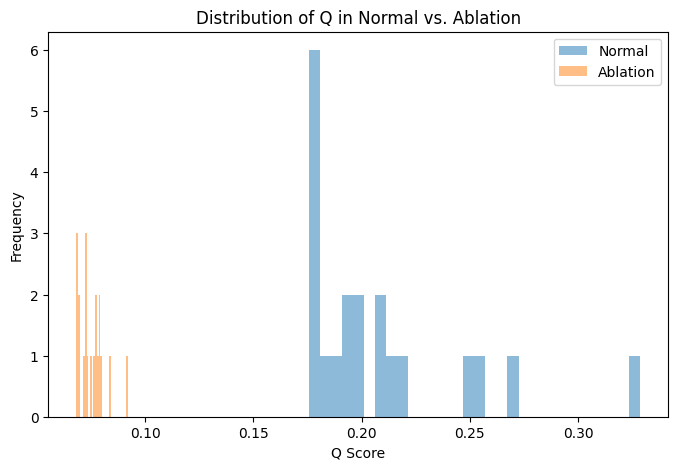

In [12]:
plt.figure(figsize=(8,5))
plt.hist(result_normal['q'], bins=30, alpha=0.5, label='Normal')
plt.hist(result_ablation['q'], bins=30, alpha=0.5, label='Ablation')
plt.xlabel('Q Score')
plt.ylabel('Frequency')
plt.title('Distribution of Q in Normal vs. Ablation')
plt.legend()
plt.show()